# Uterine Corpus Endometrial Carcinoma (UCEC)
[Jump to the urls to download the GCT and CLS files](#Downloads)


**Authors:** Alejandra Ramos, Marylu Villa and Edwin Juarez 
**Is this what you want your scientific identity to be?**  
**Contact info:** Email Edwin at [ejuarez@cloud.ucsd.edu](mailto:ejuarez@cloud.ucsd.edu) or post a question in http://www.genepattern.org/help

This notebook provides the steps to download all the UCEC samples from The Cancer Genome Atlas (TCGA) contained in the Genomic Data Commons (GDC) Data portal. These samples can be downloaded as a GCT file and phenotype labels (primary tumor vs normal samples) can be downloaded as a CLS file. These files are compatible with other GenePattern Analyses.

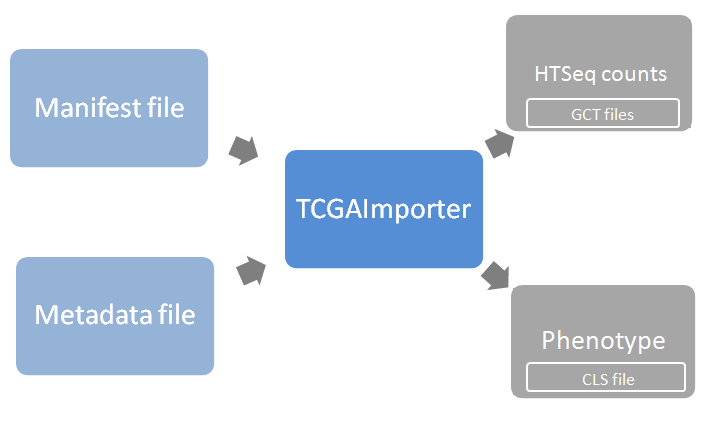

# Overview


Endometrial cancer develops in the cells that form the inner lining of the uterus, or the endometrium, and is one of the most common cancers of the female reproductive system among American women

<p><img alt="Resultado de imagen para Uterine Corpus Endometrial Carcinoma" src="https://www.cancer.gov/images/cdr/live/CDR735233.jpg" style="width: 829px; height: 500px;" /></p>


# UCEC Statistics

In 2010, approximately 43,000 women in the United States were estimated to have been diagnosed and almost 8,000 to have died of endometrial cancer. This cancer occurs most commonly in women aged 60 years or older. About 69 percent of endometrial cancers are diagnosed at an early stage, and as a result about 83 percent of women will survive five years following the time of diagnosis.

<p><img alt="Imagen relacionada" src="https://www.safeworkaustralia.gov.au/sites/swa/files/indicator_chart_1.png" /></p>
https://www.safeworkaustralia.gov.au/statistics-and-research/statistics/disease-and-injuries/disease-and-injury-statistics-stateterritory

# Dataset's Demographic information


<p>TCGA contained 578 UCEC&nbsp;samples&nbsp;(543 primary cancer samples, and 35&nbsp;normal tissue samples) from 555&nbsp;people. Below is a summary of the demographic information represented in this dataset. If you are interested in viewing the complete study, as well as the files on the GDC Data Portal, you can follow&nbsp;<a href="https://portal.gdc.cancer.gov/repository?facetTab=cases&amp;filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-UVM%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22RNA-Seq%22%5D%7D%7D%5D%7D&amp;searchTableTab=cases" target="_blank">this link.(these data were gathered on July 10th, 2018)</a></p>


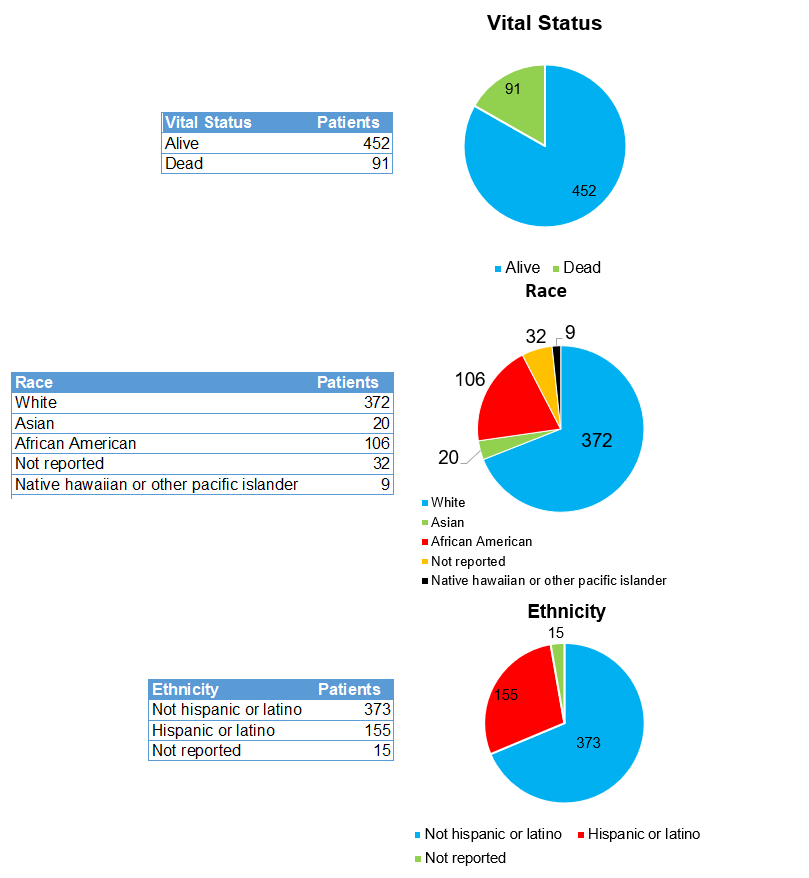

# Login to GenePattern


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Login to the *GenePattern Cloud* server.</li>
</ol>

</div>

In [12]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

# Downloading RNA-Seq HTSeq Counts Using TCGAImporter


Use the TCGAImporter module to download RNA-Seq HTSeq counts from the GDC Data Portal using a Manifest file and a Metadata file

<p><strong>Input files</strong></p>

<ul>
	<li><em>Manifest file</em>: a file containing the list of RNA-Seq samples to be downloaded.</li>
	<li><em>Metadata file</em>: a file containing information about the files present at the GDC Data Portal. Instructions for downloading the Manifest and Metadata files can be found here: <a href="https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf" target="_blank">https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf</a></li>
</ul>

<p><strong>Output files</strong></p>

<ul>
	<li><em>UCEC_TCGA.gct</em> - This is a tab delimited file that contains the gene expression&nbsp;(HTSeq&nbsp;counts) from the samples listed on the Manifest file. For more info on GCT files, look at reference <a href="#References">1</a><em> </em></li>
	<li><em><em>UCEC_TCGA.cls</em> -</em> The CLS file defines phenotype labels (in this case Primary Tumor and Normal Sample) and associates each sample in the GCT file with a label. For more info on CLS files, look at reference <a href="#References">2</a></li>
</ul>


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Load the manifest file in **Manifest** parameter.</li>
    <li>Load the metadata file in **Metadata** parameter.</li>
    <li>Click **run**.</li>
</ol>

<p><strong>Estimated run time for TCGAImporter</strong> : ~ 10 minutes</p>


In [13]:
tcgaimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')
tcgaimporter_job_spec = tcgaimporter_task.make_job_spec()
tcgaimporter_job_spec.set_parameter("manifest", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run2275209178994909933.tmp/UCEC_manifest.txt")
tcgaimporter_job_spec.set_parameter("metadata", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run1507855829424081202.tmp/UCEC_metadata.json")
tcgaimporter_job_spec.set_parameter("output_file_name", "UCEC_TCGA")
tcgaimporter_job_spec.set_parameter("gct", "True")
tcgaimporter_job_spec.set_parameter("translate_gene_id", "False")
tcgaimporter_job_spec.set_parameter("cls", "True")
genepattern.display(tcgaimporter_task)

job35211 = gp.GPJob(genepattern.session.get(0), 35211)
genepattern.display(job35211)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')

GPJobWidget(job_number=31849)

In [14]:
collapsedataset_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')
collapsedataset_job_spec = collapsedataset_task.make_job_spec()
collapsedataset_job_spec.set_parameter("dataset.file", "https://cloud.genepattern.org/gp/jobResults/31849/TCGA_dataset.gct")
collapsedataset_job_spec.set_parameter("chip.platform", "ftp://ftp.broadinstitute.org/pub/gsea/annotations/ENSEMBL_human_gene.chip")
collapsedataset_job_spec.set_parameter("collapse.mode", "Maximum")
collapsedataset_job_spec.set_parameter("output.file.name", "<dataset.file_basename>.collapsed")
genepattern.display(collapsedataset_task)


job32425 = gp.GPJob(genepattern.session.get(0), 32425)
genepattern.display(job32425)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')

GPJobWidget(job_number=32425)

# Downloads


<p>You can download the input and output files of TCGAImporter for this cancer type here:</p>

<p><strong>Inputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_MANIFEST.txt" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/UCEC/UCEC_MANIFEST.txt</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_METADATA.json" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/UCEC/UCEC_METADATA.json</a></li>
</ul>

<p><strong>Outputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.gct" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/UCEC/UCEC_TCGA.gct</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.cls" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/UCEC/UCEC_TCGA.cls</a></li>
</ul>


If you'd like to download similar files for other TCGA datasets, visit this link: 
- https://datasets.genepattern.org/?prefix=data/TCGA_HTSeq_counts/

# References

[1] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT

[2] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS


[3] https://cancergenome.nih.gov/cancersselected/endometrial</p>

[4] https://www.google.com/search?q=Uterine+Corpus+Endometrial+Carcinoma&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwiu4e_s-IjcAhVoxVQKHeflBGAQ_AUICigB&amp;biw=1366&amp;bih=586#imgrc=S5Twtt5BPC9YTM:</p>

[5] https://www.google.com/search?q=Uterine+Corpus+Endometrial+Carcinoma+statistics&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwiYz9Th-YjcAhWI3lQKHVYHAU4Q_AUICigB&amp;biw=1366&amp;bih=586#imgdii=BivuaMT2MEQd8M:&amp;imgrc=C_T7yrmM1NGcYM:</p>
